<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 12** | Regressão I
Caderno de **exercício 03**<br>

# Regressão múltipla

Discente: Samuel Saturno




Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

Carregando o banco de dados

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  

In [4]:
# Ajustando o modelo de regressão linear múltipla usando a biblioteca statsmodels
reg_tips = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()

# Calculando os resíduos do modelo ajustado
tips['res_tips'] = reg_tips .resid

# Exibindo um resumo dos resultados da regressão
reg_tips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.64e-20
Time:                        00:18:47   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Remova as variáveis não significantes.

Para identificar as variáveis não significativas, procuramos os valor de p (P>|t|) na tabela de resultados da regressão menores que 0.05.

* sex[T.Female]: 0.982
* smoker[T.No]: 0.352
* time[T.Dinner]: 0.729
* net_bill: 0.000



In [11]:
# Ajustando o modelo de regressão linear múltipla para sex e net_bill
reg_tips = smf.ols('tip ~ sex + net_bill', data=tips).fit()

# Calculando os resíduos do modelo.
tips['res_tips'] = reg_tips.resid

# Exibindo um resumo dos resultados da regressão
reg_tips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           6.94e-22
Time:                        18:37:22   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3382      0.185      7.218      0.000       0.973       1.703
sex[T.Female]    -0.0150      0.153     -0.098      0.922      -0.317       0.287
net_bill          0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sex', ylabel='res_tips'>

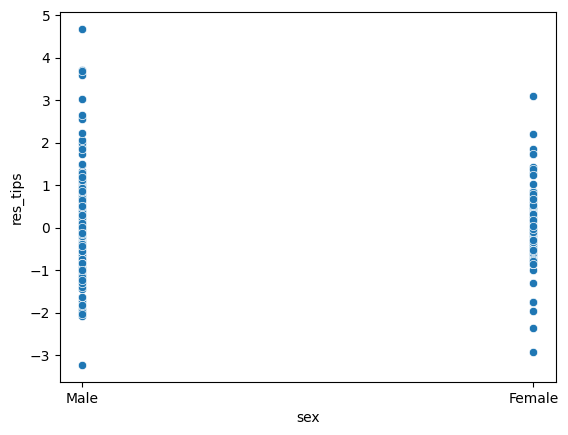

In [6]:
# Usando o close para fechar os demais gráficos
plt.close('all')

# criando o gráfico de dispersão para res_tips e sex
sns.scatterplot(x='sex', y='res_tips', data=tips)

3. Observe o gráfico de resíduos em função de ```net_bill```

In [5]:
# Ajustando o modelo de regressão linear múltipla para smoker e net_bill
reg_tips = smf.ols('tip ~ smoker + net_bill', data=tips).fit()

# Calculando os resíduos do modelo.
tips['res_tips'] = reg_tips.resid

# Exibindo um resumo dos resultados da regressão
reg_tips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.56e-22
Time:                        00:31:08   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='smoker', ylabel='res_tips'>

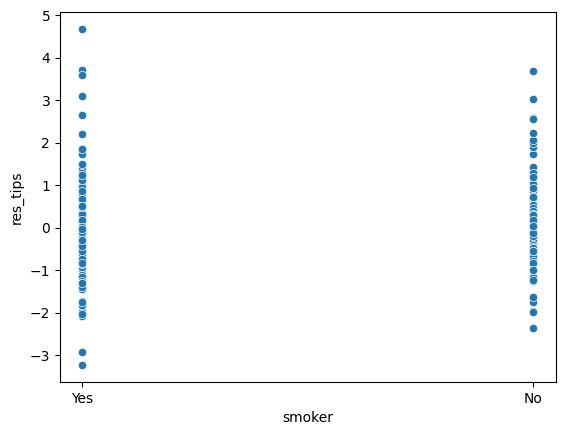

In [9]:
# Fechando as figuras previamente abertas e garantido a legibilidade do gráfico
plt.close('all')

# Criando um gráfico de dispersão para smoker e res_tips
sns.scatterplot(x='smoker', y='res_tips', data=tips)

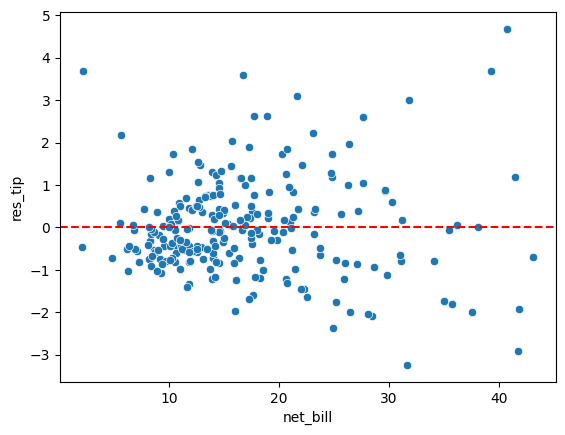

In [11]:
# Fecha todas as figuras previamente abertas para limpar o ambiente de plotagem
plt.close('all')

# Plot dos resíduos em relação à variável 'net_bill'
sns.scatterplot(x='net_bill', y='res_tip', data=tips)

# Adiciona uma linha horizontal no gráfico
plt.axhline(y=0, color='r', linestyle='--')

4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [12]:
# Ajustando o modelo com 'net_bill' transformada logaritmicamente
reg_log = smf.ols('tip ~ smoker + np.log(net_bill)', data=tips).fit()

# Exibindo um resumo dos resultados da regressão
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.38e-19
Time:                        00:44:51   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

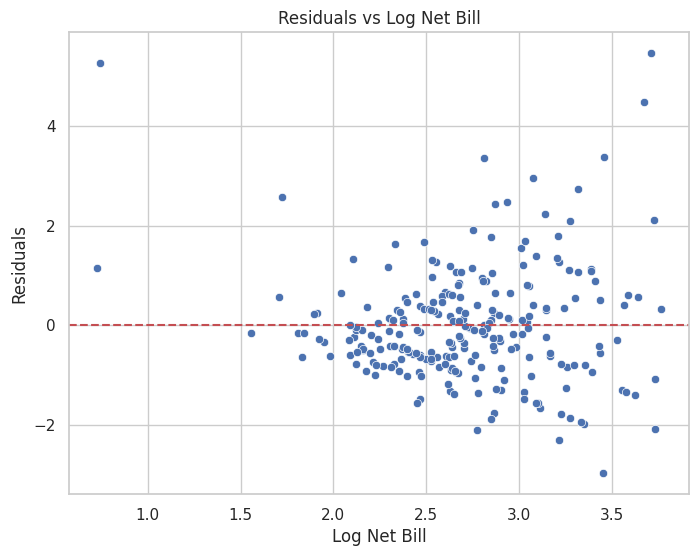

In [16]:
# Calculando os resíduos
tips['residuals'] = reg_log.resid

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x=np.log(tips['net_bill']), y='residuals', data=tips)

# Adicionando uma linha horizontal no centro do gráfico
plt.axhline(y=0, color='r', linestyle='--')

# Configurando o título e rótulos dos eixos
plt.title('Residuals vs Log Net Bill')
plt.xlabel('Log Net Bill')
plt.ylabel('Residuals')

# Mostrando o gráfico
plt.show()


In [19]:
# Ajustando o modelo com 'net_bill' transformada em polinômio
reg_poly = smf.ols('tip ~ smoker + np.power(net_bill, 2)', data=tips).fit()

# Exibindo um resumo dos resultados da regressão
reg_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.04e-19
Time:                        00:56:47   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]              0.1696      0.154      1.102      0.271      -0.133       0.473
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

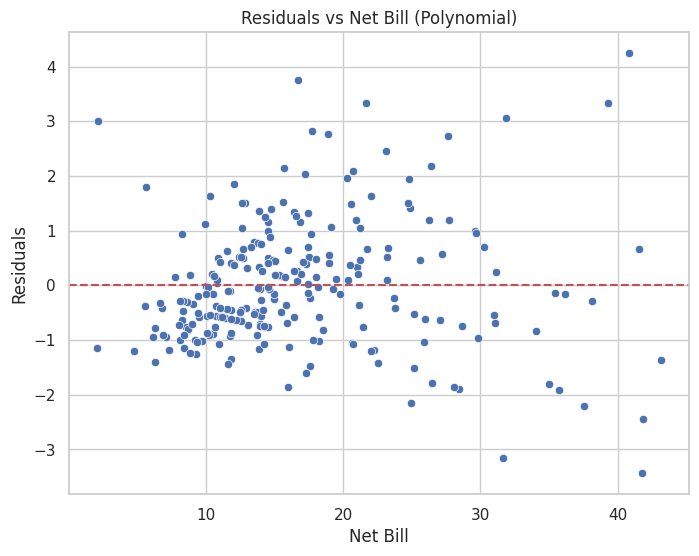

In [20]:
# Calculando os resíduos
tips['residuals_poly'] = reg_poly.resid

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_bill', y='residuals_poly', data=tips)

# Adicionando uma linha horizontal no centro do gráfico
plt.axhline(y=0, color='r', linestyle='--')

# Configurando o título e rótulos dos eixos
plt.title('Residuals vs Net Bill (Polynomial)')
plt.xlabel('Net Bill')
plt.ylabel('Residuals')

# Mostrando o gráfico
plt.show()


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.

In [25]:
# Criando a fórmula para o modelo
formula = 'np.log(tip) ~ sex + smoker + time + net_bill'

# Criando a matriz de design e a matriz de resposta
y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

# Mostrando as matrizes
print("Matriz de Resposta (y):")
print(y.head())

print("\nMatriz de Design (X):")
print(X.head())


Matriz de Resposta (y):
   np.log(tip)
0     0.009950
1     0.506818
2     1.252763
3     1.196948
4     1.283708

Matriz de Design (X):
   Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
0        1.0            1.0           1.0             1.0     15.98
1        1.0            0.0           1.0             1.0      8.68
2        1.0            0.0           1.0             1.0     17.51
3        1.0            0.0           1.0             1.0     20.37
4        1.0            1.0           1.0             1.0     20.98


In [27]:
# Ajustando o modelo de regressão linear com 'tip_pct' como variável dependente e 'sex', 'smoker', 'time' e 'net_bill' como variáveis independentes
reg_tip_pct_1 = smf.ols('tip_pct ~ sex + smoker + time + net_bill', data=tips).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'tips'
tips['res_tip_pct_1'] = reg_tip_pct_1.resid

# Exibindo um resumo dos resultados da regressão
reg_tip_pct_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.85e-05
Time:                        01:09:27   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Ajustando um modelo de regressão linear com 'tip_pct' como variável dependente e 'smoker' e 'net_bill' como variáveis independentes
reg_tip_pct_2 = smf.ols('tip_pct ~ smoker + net_bill', data=tips).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'tips'
tips['res_tip_pct_2'] = reg_tip_pct_2.resid

# Exibindo um resumo dos resultados da regressão
reg_tip_pct_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.77
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.17e-06
Time:                        01:10:44   Log-Likelihood:                 109.52
No. Observations:                 244   AIC:                            -213.0
Df Residuals:                     241   BIC:                            -202.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3309      0.027     12.087      0.000       0.277       0.385
smoker[T.No]    -0.0358      0.021     -1.739      0.083      -0.076       0.005
net_bill        -0.0063      0.001     -5.093      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      464.437   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224133.702
Skew:                          10.904   Prob(JB):                         0.00
Kurtosis:                     149.869   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

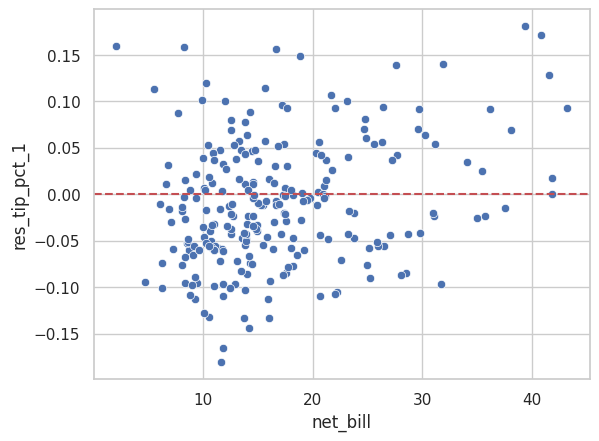

In [29]:
# Fecha todas as figuras previamente abertas para limpar o ambiente de plotagem
plt.close('all')

# Cria um gráfico de dispersão usando a biblioteca seaborn, filtrando os dados onde 'tip_pct' é menor que 0.5
sns.scatterplot(x='net_bill', y='res_tip_pct_1', data=tips[tips['tip_pct'] < .5])

# Adiciona uma linha horizontal no gráfico no eixo y, onde y = 0
# A linha é desenhada na cor vermelha e é pontilhada
plt.axhline(y=0, color='r', linestyle='--')


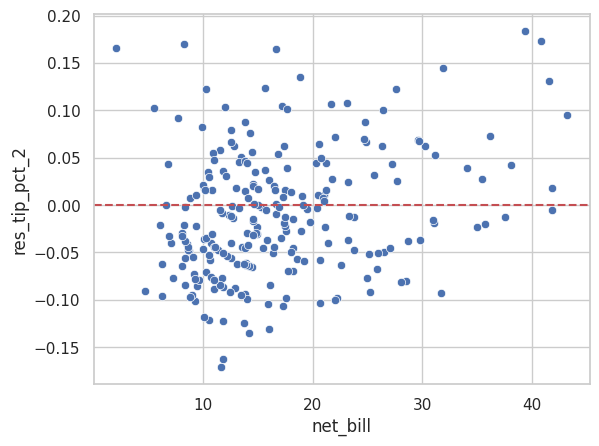

In [30]:
# Fecha todas as figuras previamente abertas para limpar o ambiente de plotagem
plt.close('all')

# Cria um gráfico de dispersão usando a biblioteca seaborn
# O eixo x é 'net_bill', o eixo y é 'res_tip_pct_2', limitado aos valores de 'tip_pct' menores que 0.5
sns.scatterplot(x='net_bill', y='res_tip_pct_2', data=tips[tips['tip_pct'] < .5])

# Adiciona uma linha horizontal no gráfico no eixo y, onde y = 0
# A linha é desenhada na cor vermelha e é pontilhada
plt.axhline(y=0, color='r', linestyle='--')


In [31]:
# Ajustando um modelo de regressão linear com 'tip_pct' como variável dependente e 'smoker' e o log de 'net_bill' como variáveis independentes
reg_tip_pct_3 = smf.ols('tip_pct ~ smoker + np.log(net_bill)', data=tips).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'tips'
tips['res_tip_pct_3'] = reg_tip_pct_3.resid

# Exibindo um resumo dos resultados da regressão
reg_tip_pct_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     32.17
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.13e-13
Time:                        01:13:35   Log-Likelihood:                 125.19
No. Observations:                 244   AIC:                            -244.4
Df Residuals:                     241   BIC:                            -233.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6412      0.056     11.533      0.000       0.532       0.751
smoker[T.No]        -0.0319      0.019     -1.657      0.099      -0.070       0.006
np.log(net_bill)    -0.1547      0.020     -7.907      0.000      -0.193      -0.116
==============================================================================
Omnibus:                      436.655   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163563.737
Skew:                           9.667   Prob(JB):                         0.00
Kurtosis:                     128.357   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Ajustando um modelo de regressão linear com 'tip_pct' como variável dependente e 'smoker' e 'net_bill' ao quadrado como variáveis independentes
reg_tip_pct_4 = smf.ols('tip_pct ~ smoker + np.power(net_bill, 2)', data=tips).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'tips'
tips['res_tip_pct_4'] = reg_tip_pct_4.resid

# Exibindo um resumo dos resultados da regressão
reg_tip_pct_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.215
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           0.000354
Time:                        01:32:58   Log-Likelihood:                 104.37
No. Observations:                 244   AIC:                            -202.7
Df Residuals:                     241   BIC:                            -192.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2628      0.020     13.064      0.000       0.223       0.302
smoker[T.No]             -0.0355      0.021     -1.687      0.093      -0.077       0.006
np.power(net_bill, 2)    -0.0001    2.9e-05     -3.859      0.000      -0.000   -5.47e-05
==============================================================================
Omnibus:                      467.947   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232494.687
Skew:                          11.070   Prob(JB):                         0.00
Kurtosis:                     152.593   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Imprime o valor do coeficiente de determinação (R²) para o Modelo 1
print(f"R² do Modelo 1: {reg_tip_pct_1.rsquared*100:.2f}%")

# Imprime o valor do coeficiente de determinação (R²) para o Modelo 3
print(f"R² do Modelo 3: {reg_tip_pct_3.rsquared*100:.2f}%")


R² do Modelo 1: 10.70%
R² do Modelo 3: 21.07%


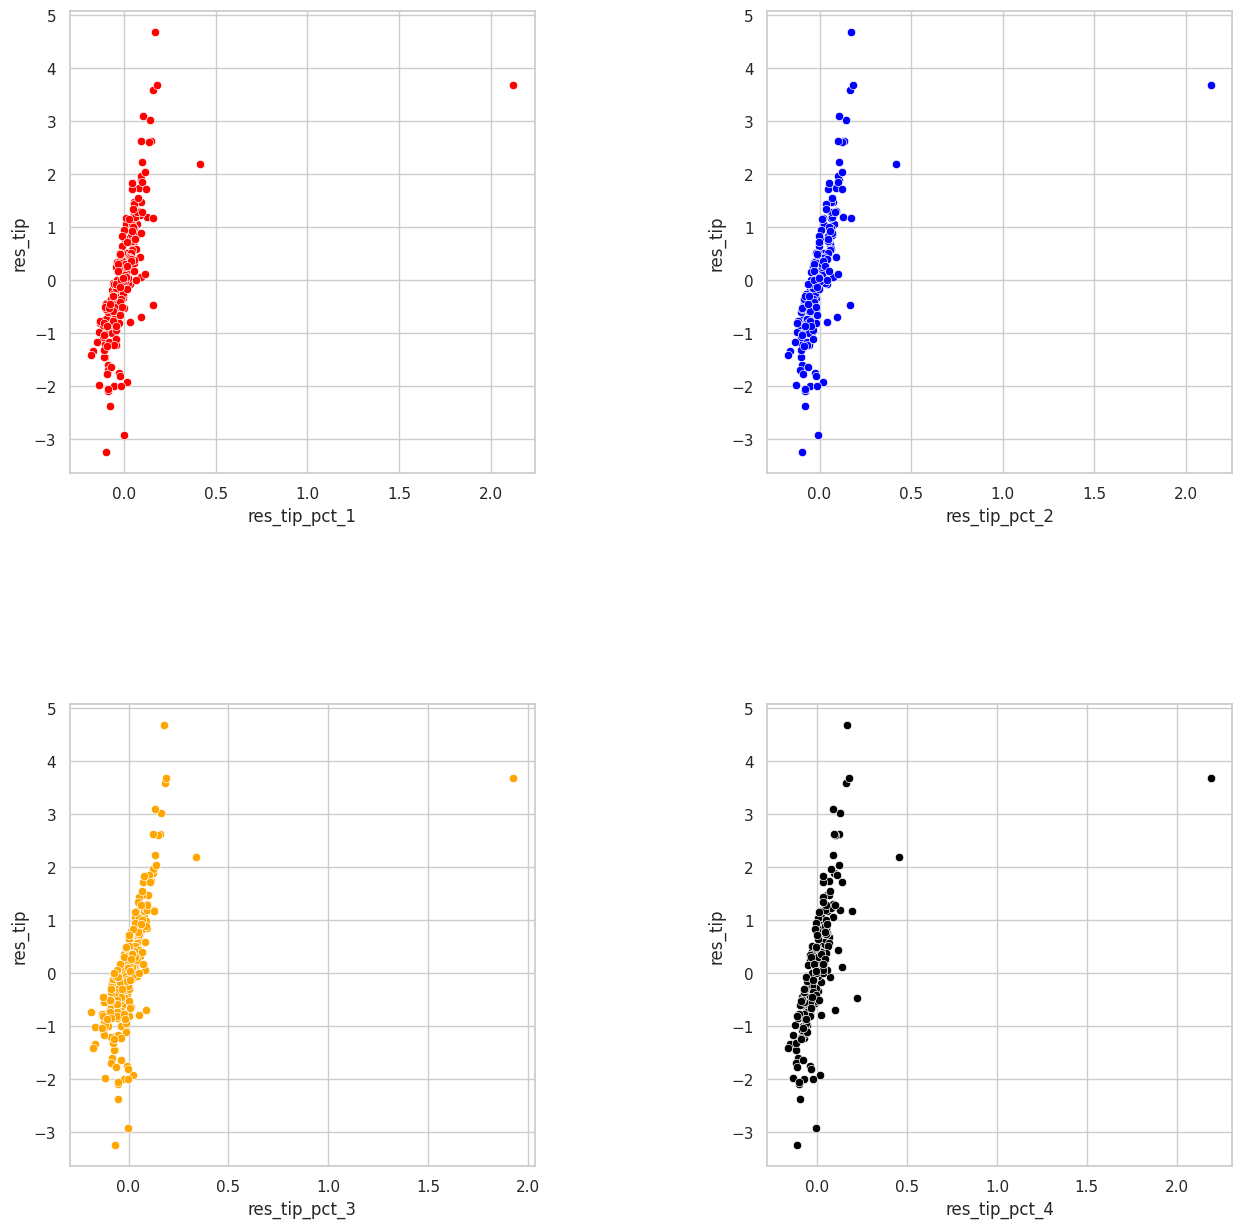

In [35]:
# Fecha todas as figuras previamente abertas para limpar o ambiente de plotagem
plt.close('all')

# Define o tamanho padrão das figuras para 15x15 polegadas
plt.rc('figure', figsize=(15, 15))

# Cria uma grade de subplots 2x2
fig, axes = plt.subplots(2, 2)

# Plota os gráficos de dispersão dos resíduos normalizados em relação aos resíduos do modelo original para cada modelo ajustado
sns.scatterplot(ax=axes[0, 0], x=tips['res_tip_pct_1'], y=tips['res_tip'], color='red')
sns.scatterplot(ax=axes[0, 1], x=tips['res_tip_pct_2'], y=tips['res_tip'], color='blue')
sns.scatterplot(ax=axes[1, 0], x=tips['res_tip_pct_3'], y=tips['res_tip'], color='orange')
sns.scatterplot(ax=axes[1, 1], x=tips['res_tip_pct_4'], y=tips['res_tip'], color='black')

# Ajusta o espaçamento entre os subplots horizontalmente e verticalmente
plt.subplots_adjust(wspace=0.5, hspace=0.5)


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importando o banco de dados previsao_de_renda.csv

In [37]:
df = pd.read_csv('/content/drive/MyDrive/previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [46]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'res_renda_simples',
       'res_renda_simples_2'],
      dtype='object')

1. Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [38]:
# Ajustando um modelo de regressão linear simples com 'renda' como variável dependente e 'tempo_emprego' como variável independente
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'df'
df['res_renda_simples'] = reg_renda_simples.resid

# Exibindo um resumo dos resultados da regressão
reg_renda_simples.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:50:04   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?


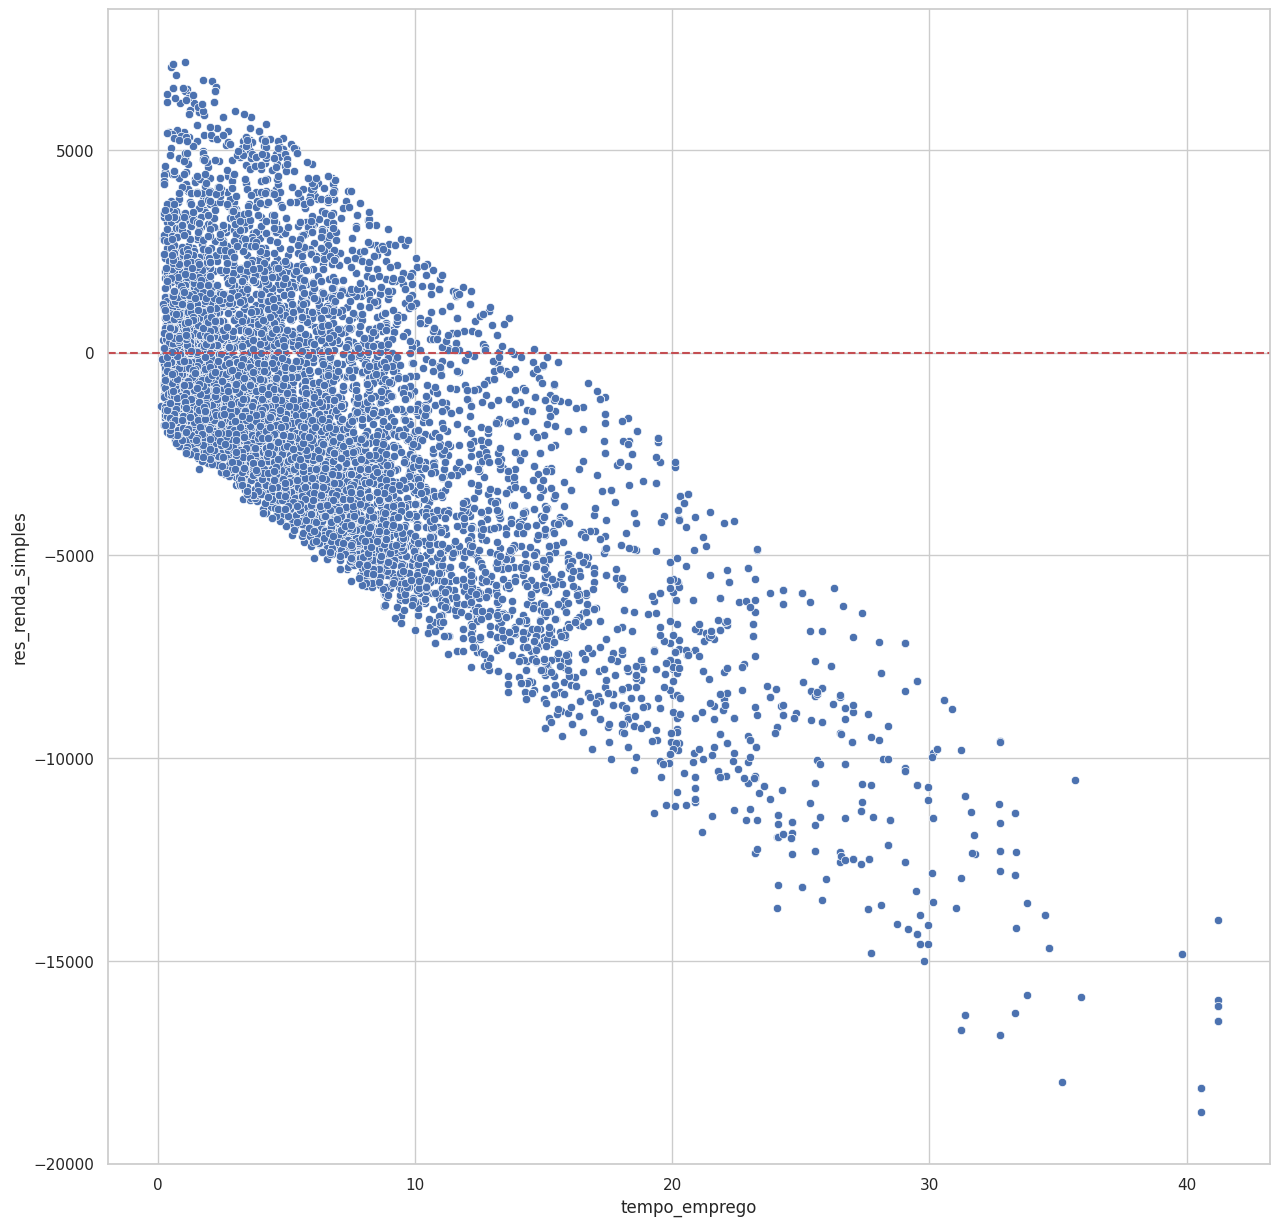

In [40]:
# Fecha todas as figuras previamente abertas para limpar o ambiente de plotagem
plt.close('all')

# Cria um gráfico de dispersão
# Plot dos resíduos em relação à variável 'tempo_emprego', apenas para observações onde 'renda' é inferior a 10000
sns.scatterplot(x='tempo_emprego', y='res_renda_simples', data=df[df['renda'] < 10000])

# Adiciona uma linha horizontal no gráfico no eixo y, onde y = 0
# A linha é desenhada na cor vermelha e é pontilhada
plt.axhline(y=0, color='r', linestyle='--')


In [41]:
# Ajustando um modelo de regressão linear com o logaritmo de 'renda' como variável dependente e 'tempo_emprego' como variável independente
reg_renda_simples_2 = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'df'
df['res_renda_simples_2'] = reg_renda_simples_2.resid

# Exibindo um resumo dos resultados da regressão
reg_renda_simples_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        01:54:31   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

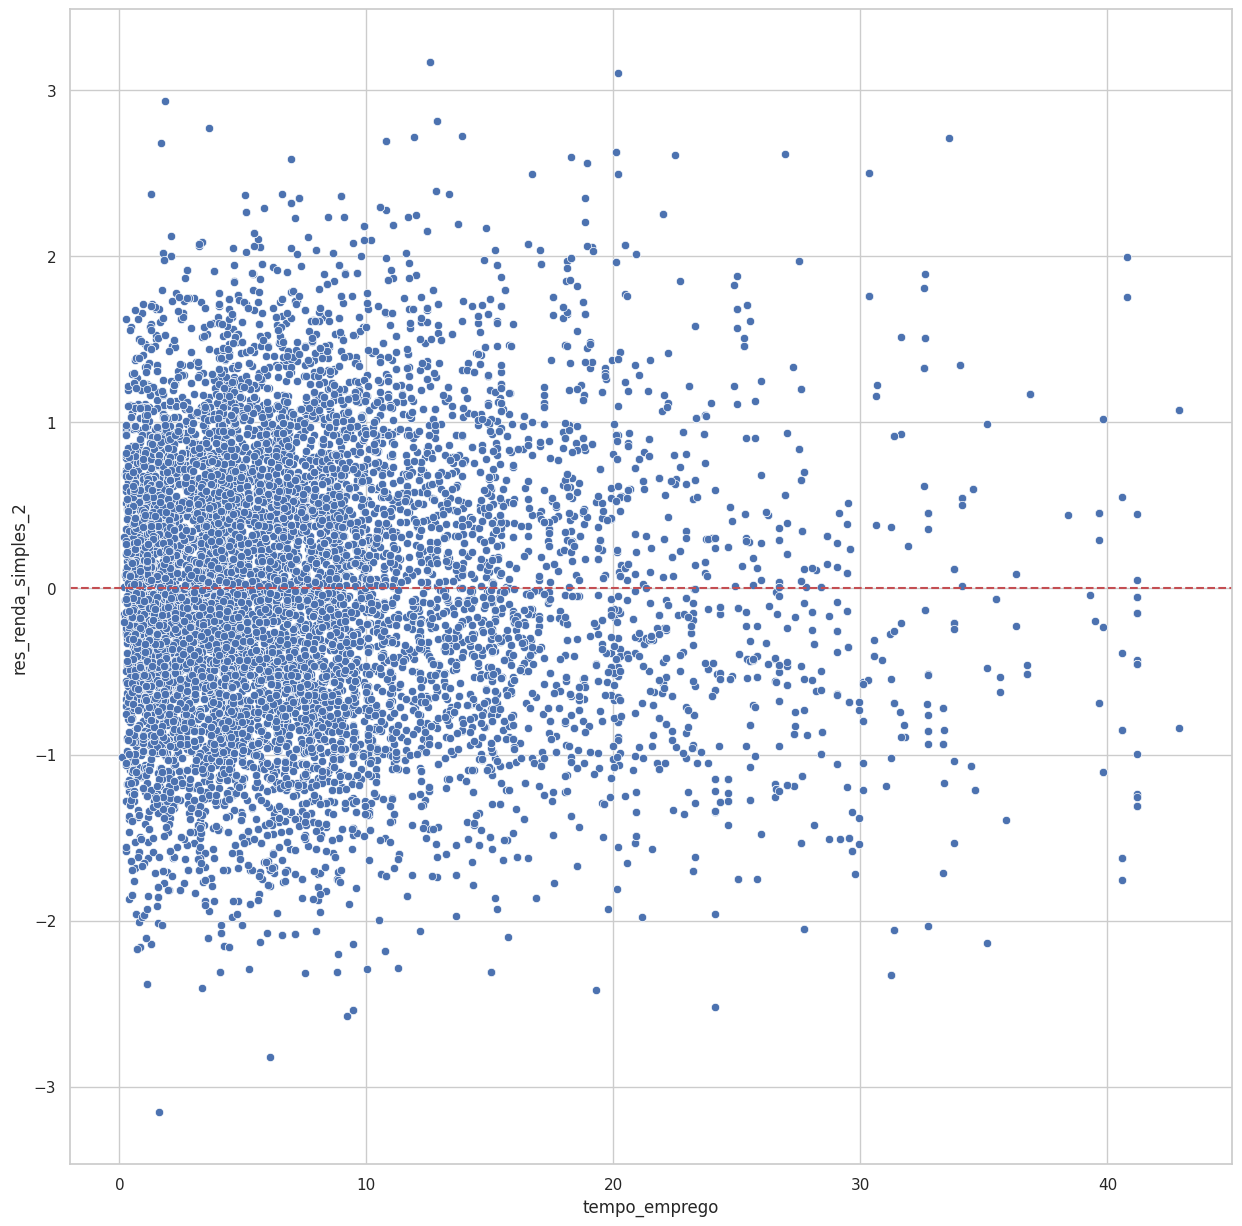

In [42]:
# Fecha todas as figuras previamente abertas para limpar o ambiente de plotagem
plt.close('all')

# Cria um gráfico de dispersão usando a biblioteca seaborn
# Plot dos resíduos ('res_renda_simples_2') em relação à variável 'tempo_emprego'
sns.scatterplot(x='tempo_emprego', y='res_renda_simples_2', data=df)

# Adiciona uma linha horizontal no gráfico no eixo y, onde y = 0
# A linha é desenhada na cor vermelha e é pontilhada
plt.axhline(y=0, color='r', linestyle='--')


In [43]:
# Imprime uma mensagem informando que o R² do segundo modelo diminuiu, mas os coeficientes e erros padrão se aproximaram de 0
print(f"O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.")

# Imprime o valor do R² para o primeiro modelo de regressão de renda simples
print(f"R² do Modelo 1: {reg_renda_simples.rsquared*100:.2f}%")

# Imprime o valor do R² para o segundo modelo de regressão de renda simples
print(f"R² do Modelo 2: {reg_renda_simples_2.rsquared*100:.2f}%")


O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.
R² do Modelo 1: 14.82%
R² do Modelo 2: 17.11%


In [47]:
# Ajustando um modelo de regressão linear múltipla com 'renda' como variável dependente e várias outras variáveis independentes
reg_renda_multi = smf.ols('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'df'
df['res_renda_multi'] = reg_renda_multi.resid

# Exibindo um resumo dos resultados da regressão
reg_renda_multi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     112.7
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:01:00   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12388   BIC:                         2.579e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5879.4874   2515.712     -2.337      0.019   -1.08e+04    -948.300
data_ref[T.2015-02-01]             -50.5760    377.087     -0.134      0.893    -789.726     688.574
data_ref[T.2015-03-01]             224.3334    378.075      0.593      0.553    -516.753     965.420
data_ref[T.2015-04-01]             644.2383    376.941      1.709      0.087     -94.624    1383.101
data_ref[T.2015-05-01]             177.6984    375.907      0.473      0.636    -559.138     914.535
data_ref[T.2015-06-01]             642.5355    377.474      1.702      0.089     -97.373    1382.444
data_ref[T.2015-07-01]             368.1166    376.181      0.979      0.328    -369.256    1105.490
data_ref[T.2015-08-01]             210.0260    377.469      0.556      0.578    -529.872     949.924
data_ref[T.2015-09-01]             153.4899    374.937      0.409      0.682    -581.446     888.425
data_ref[T.2015-10-01]             270.5873    377.498      0.717      0.474    -469.367    1010.542
data_ref[T.2015-11-01]             445.9166    377.674      1.181      0.238    -294.384    1186.217
data_ref[T.2015-12-01]             621.5670    378.978      1.640      0.101    -121.289    1364.423
data_ref[T.2016-01-01]             302.8712    377.441      0.802      0.422    -436.972    1042.715
data_ref[T.2016-02-01]             -41.6680    377.355     -0.110      0.912    -781.342     698.006
data_ref[T.2016-03-01]              57.9217    380.707      0.152      0.879    -688.323     804.166
sexo[T.M]                         6054.7914    155.926     38.831      0.000    5749.152    6360.431
posse_de_veiculo[T.True]            48.1619    150.456      0.320      0.749    -246.755     343.079
posse_de_imovel[T.True]            363.7476    148.821      2.444      0.015      72.035     655.460
tipo_renda[T.Bolsista]           -1285.7818   2566.067     -0.501      0.616   -6315.672    3744.108
tipo_renda[T.Empresário]           829.2786    158.912      5.218      0.000     517.786    1140.771
tipo_renda[T.Pensionista]        -2725.7882   2566.941     -1.062      0.288   -7757.392    2305.816
tipo_renda[T.Servidor público]     138.7937    236.527      0.587      0.557    -324.836     602.424
educacao[T.Pós graduação]         1017.3601   1691.601      0.601      0.548   -2298.441    4333.161
educacao[T.Secundário]             570.3332    766.157      0.744      0.457    -931.455    2072.121
educacao[T.Superior completo]     1185.7821    769.133      1.542      0.123    -321.837    2693.402
educacao[T.Superior incompleto]    166.9395    827.796      0.202      0.840   -1455.669    1789.548
estado_civil[T.Separado]          1164.5763   1183.767      0.984      0.325   -1155.791    3484.944
estado_civil[T.Solteiro]           825.4338   1158.89

In [48]:
# Ajustando um modelo de regressão linear múltipla com o logaritmo da 'renda' como variável dependente e algumas variáveis independentes
reg_renda_multi_2 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + np.power(idade, 2) + tempo_emprego', data=df).fit()

# Calculando os resíduos do modelo ajustado e armazenando-os em uma nova coluna no DataFrame 'df'
df['res_renda_multi_2'] = reg_renda_multi_2.resid

# Exibindo um resumo dos resultados da regressão
reg_renda_multi_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1315.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:02:03   Log-Likelihood:                -13677.
No. Observations:               12427   AIC:                         2.737e+04
Df Residuals:                   12421   BIC:                         2.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.3431      0.020    366.593      0.000       7.304       7.382
sexo[T.M]                    0.7691      0.015     52.828      0.000       0.741       0.798
posse_de_veiculo[T.True]     0.0585      0.014      4.153      0.000       0.031       0.086
posse_de_imovel[T.True]      0.0882      0.014      6.394      0.000       0.061       0.115
np.power(idade, 2)        5.099e-05   8.78e-06      5.804      0.000    3.38e-05    6.82e-05
tempo_emprego                0.0611      0.001     59.359      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.211
Skew:                           0.022   Prob(JB):                        0.546
Kurtosis:                       3.020   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Imprimindo o valor do coeficiente de determinação (R²) para o Modelo 1
print(f"R² do Modelo 1: {reg_renda_multi.rsquared*100:.2f}%")

# Imprimindo o valor do coeficiente de determinação (R²) para o Modelo 2
print(f"R² do Modelo 2: {reg_renda_multi_2.rsquared*100:.2f}%")


R² do Modelo 1: 25.69%
R² do Modelo 2: 34.61%


<Axes: xlabel='sexo', ylabel='res_renda_multi_2'>

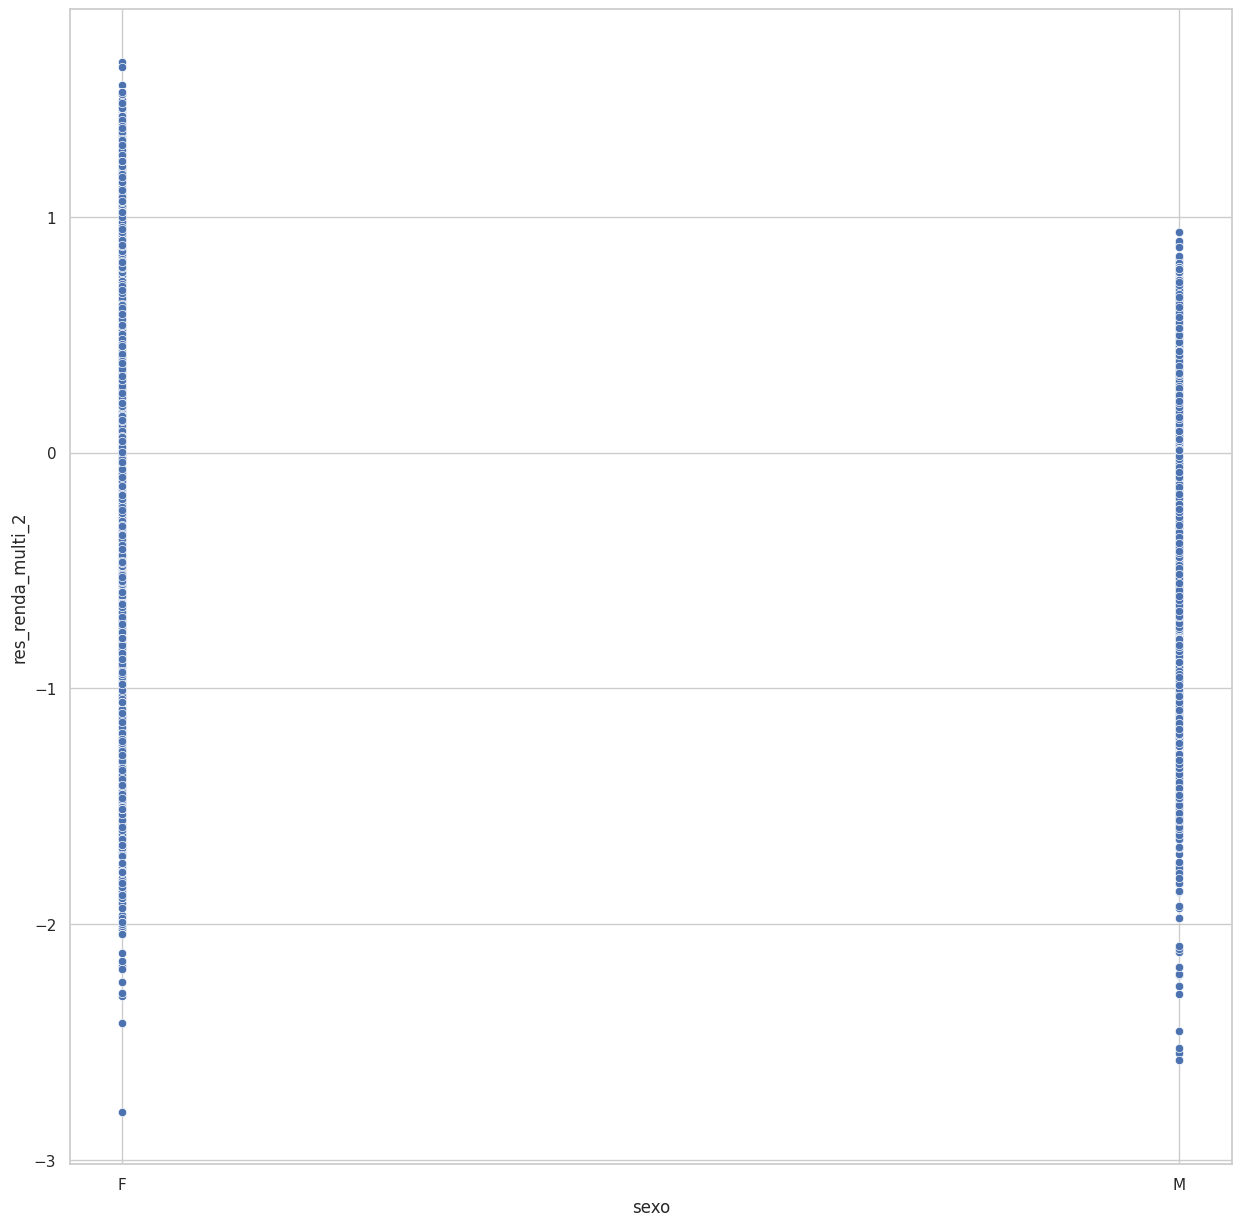

In [50]:
# Criando um gráfico de dispersão com 'sexo' no eixo x e 'res_renda_multi_2' no eixo y
# Apenas para os dados em que 'renda' é menor que 10000
sns.scatterplot(x='sexo', y='res_renda_multi_2', data=df[df['renda'] < 10000])


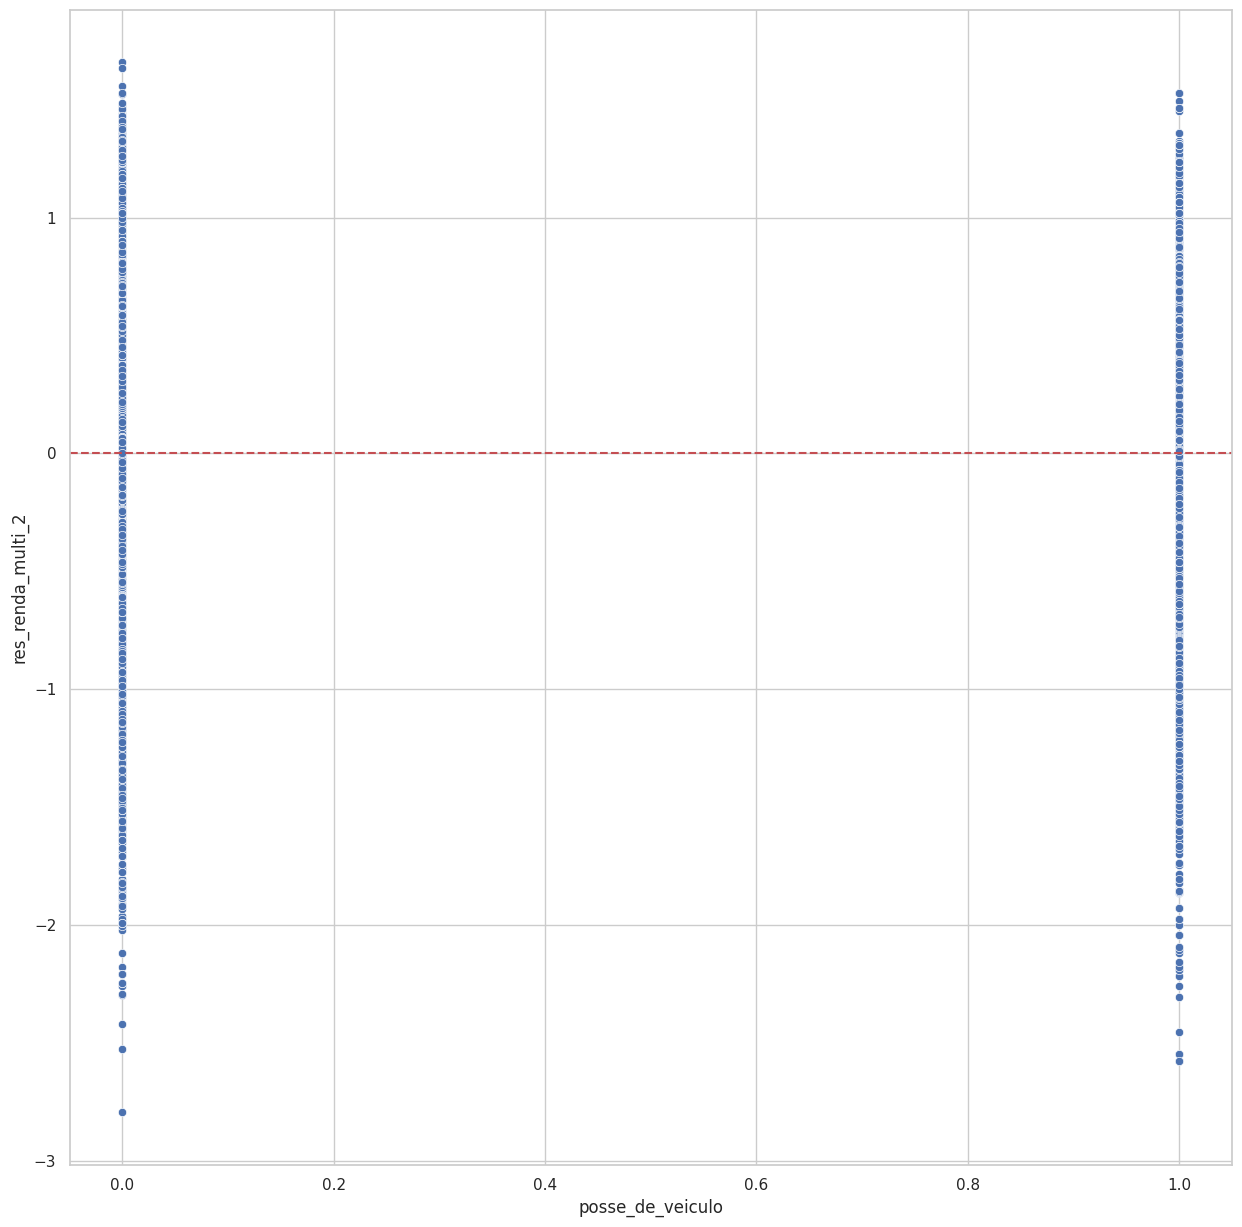

In [51]:
# Criando um gráfico de dispersão com 'posse_de_veiculo' no eixo x e 'res_renda_multi_2' no eixo y
# Apenas para os dados em que 'renda' é menor que 10000
sns.scatterplot(x='posse_de_veiculo', y='res_renda_multi_2', data=df[df['renda'] < 10000])

# Adicionando uma linha horizontal representando a média dos resíduos
plt.axhline(y=0, color='r', linestyle='--')


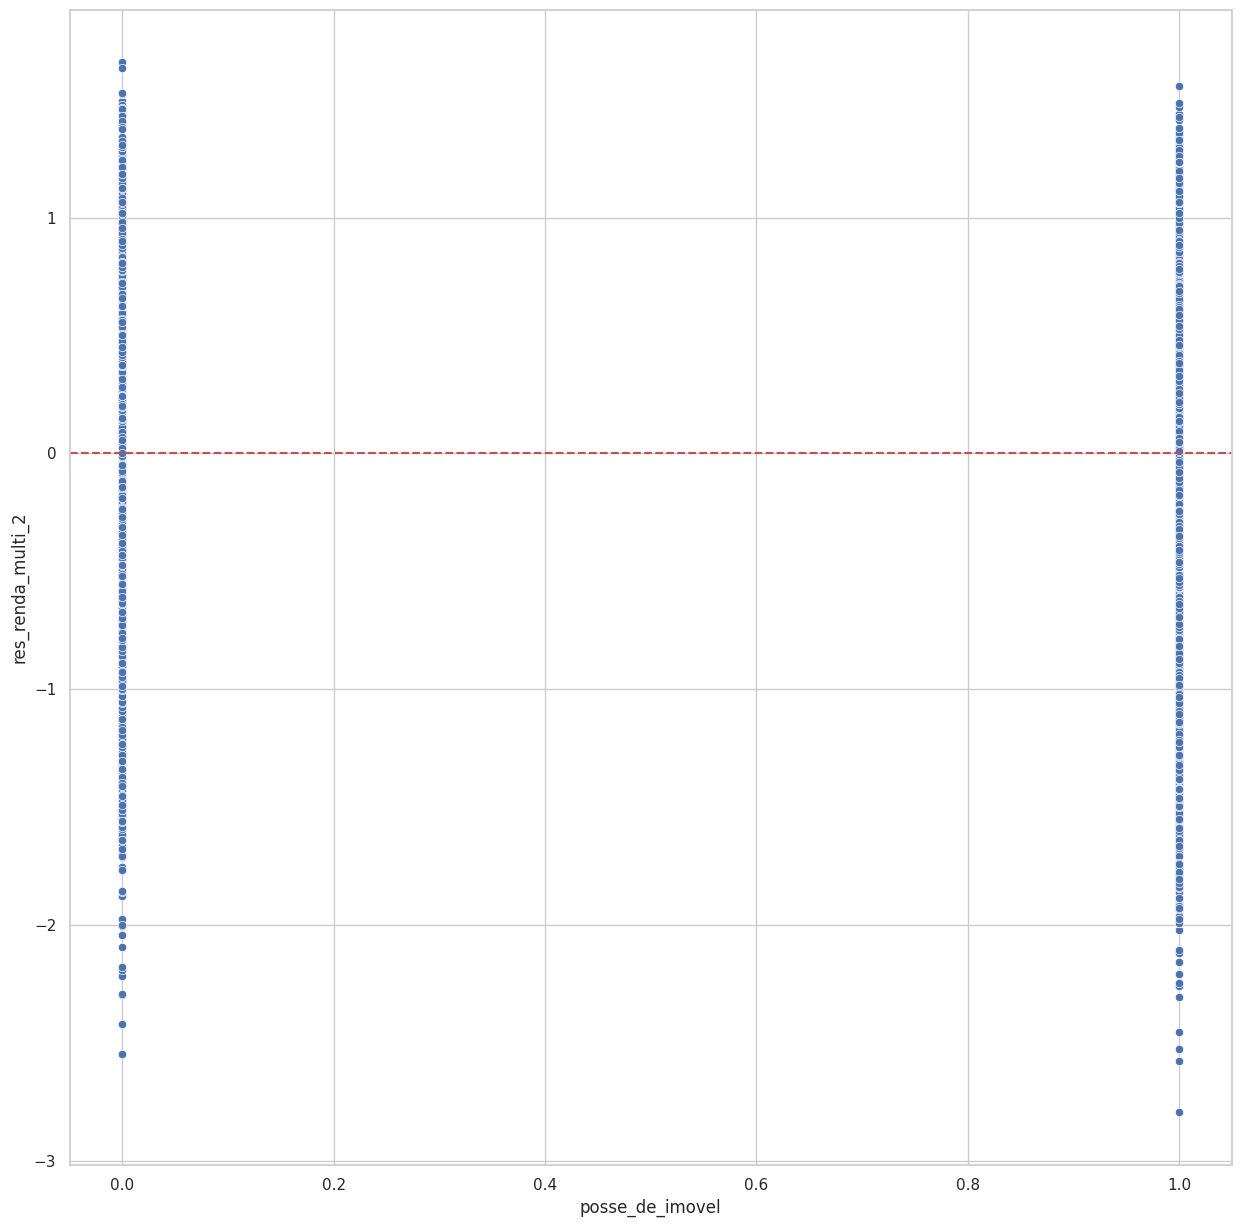

In [52]:
# Criando um gráfico de dispersão com 'posse_de_imovel' no eixo x e 'res_renda_multi_2' no eixo y
# Apenas para os dados em que 'renda' é menor que 10000
sns.scatterplot(x='posse_de_imovel', y='res_renda_multi_2', data=df[df['renda'] < 10000])

# Adicionando uma linha horizontal representando a média dos resíduos
plt.axhline(y=0, color='r', linestyle='--')


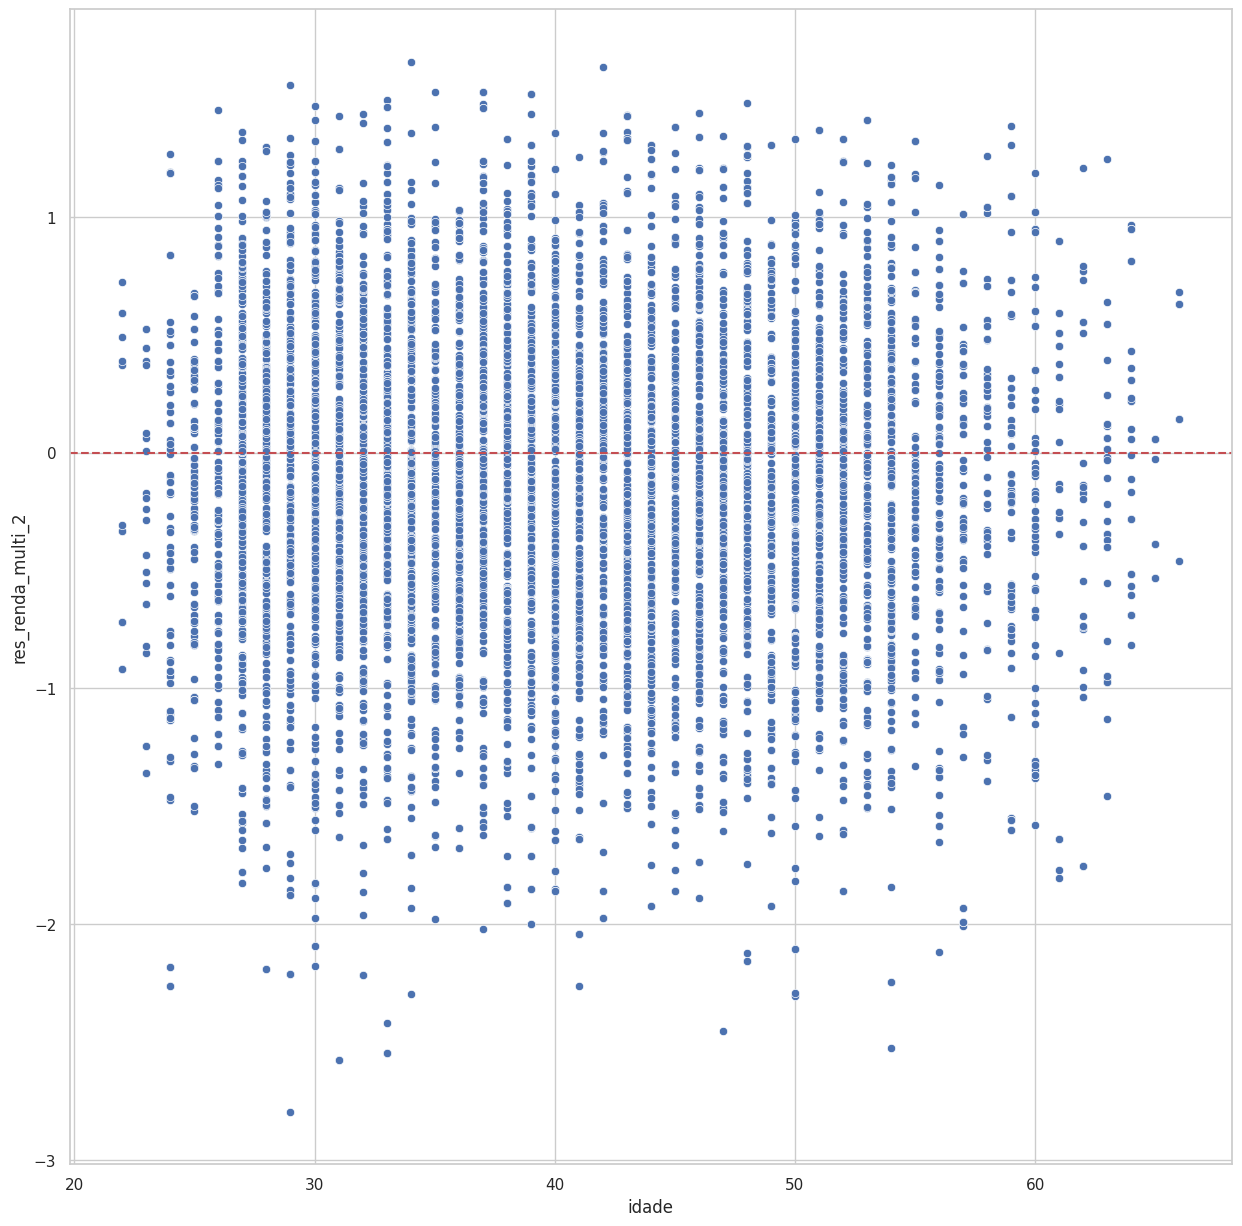

In [53]:
# Criando um gráfico de dispersão com 'idade' no eixo x e 'res_renda_multi_2' no eixo y
# Apenas para os dados em que 'renda' é menor que 10000
sns.scatterplot(x='idade', y='res_renda_multi_2', data=df[df['renda'] < 10000])

# Adicionando uma linha horizontal representando a média dos resíduos
plt.axhline(y=0, color='r', linestyle='--')


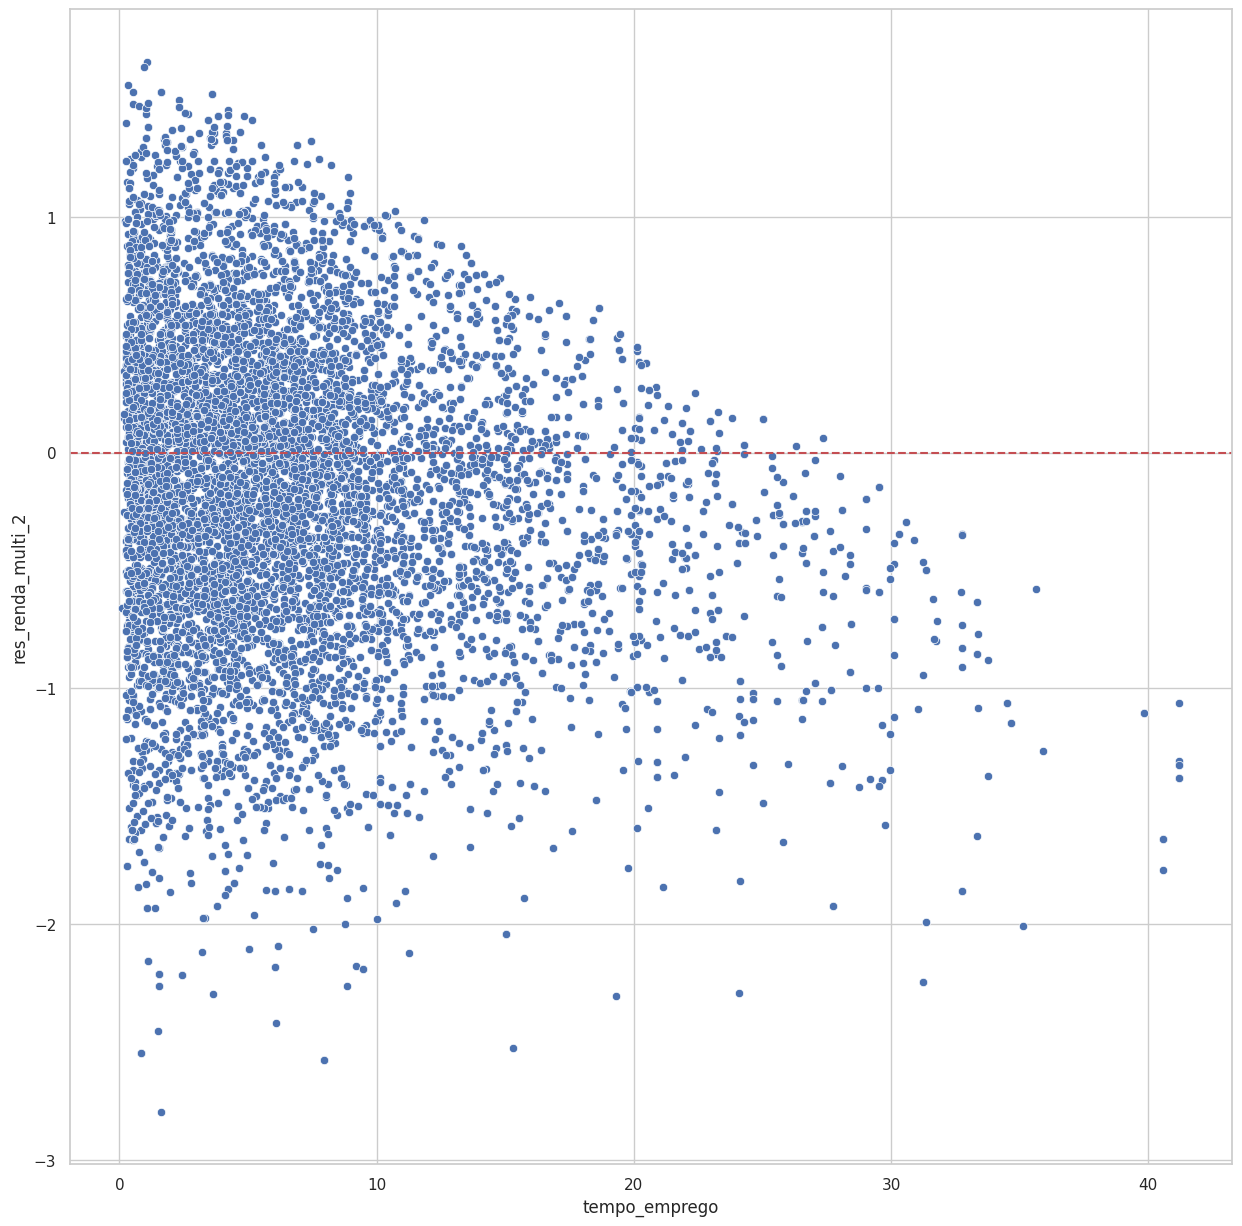

In [54]:
# Criando um gráfico de dispersão com 'tempo_emprego' no eixo x e 'res_renda_multi_2' no eixo y
# Apenas para os dados em que 'renda' é menor que 10000
sns.scatterplot(x='tempo_emprego', y='res_renda_multi_2', data=df[df['renda'] < 10000])

# Adicionando uma linha horizontal representando a média dos resíduos
plt.axhline(y=0, color='r', linestyle='--')


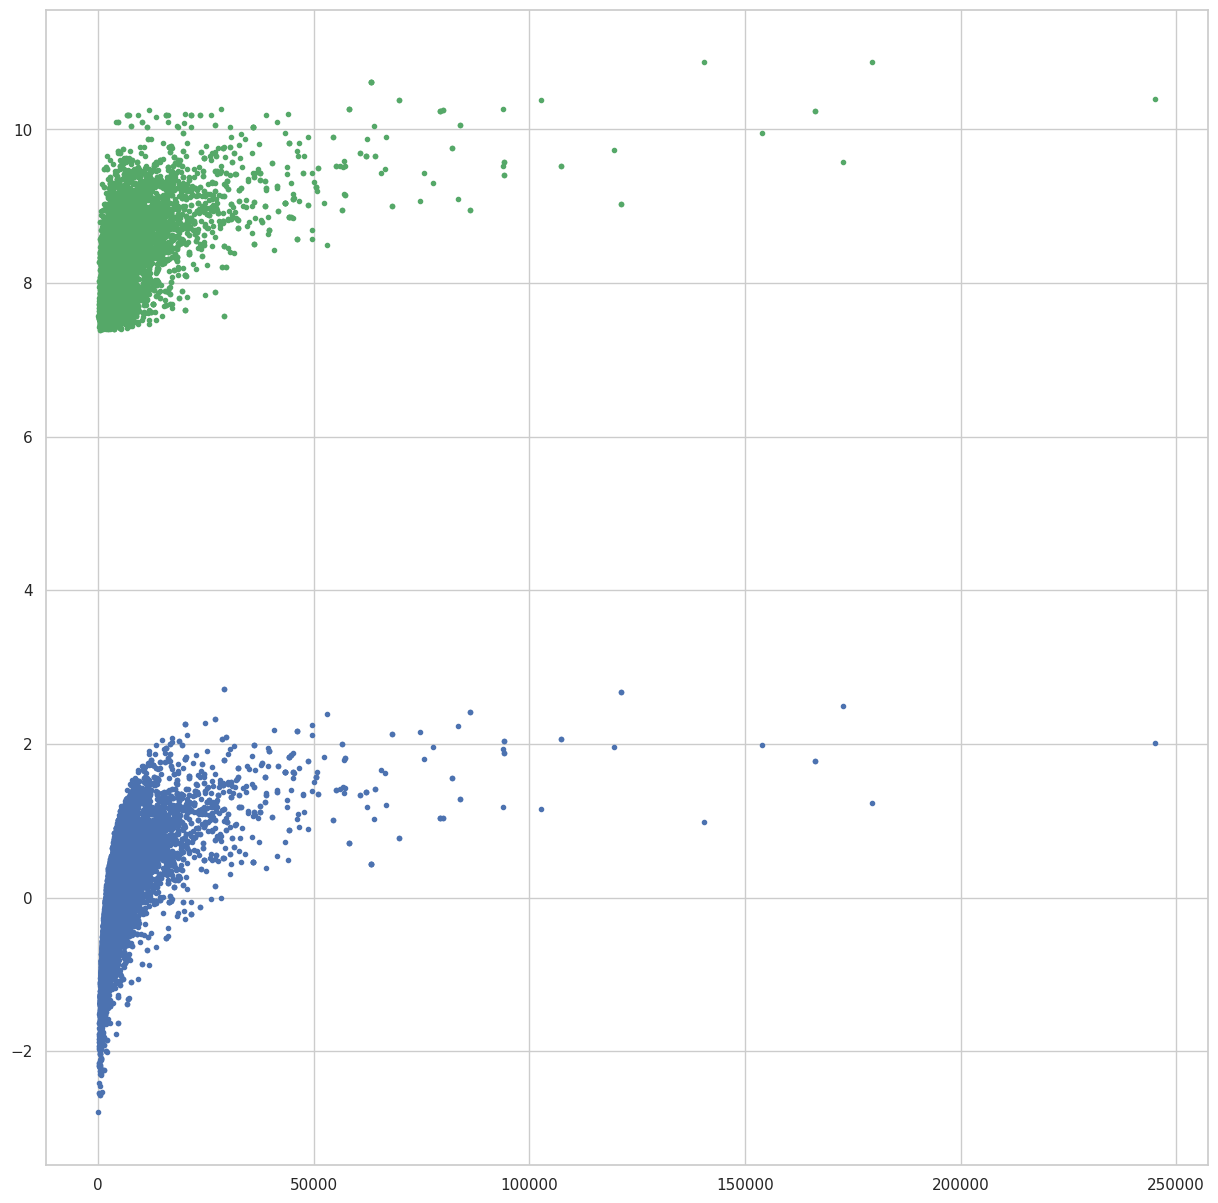

In [57]:
# Criando uma nova coluna no DataFrame 'df' chamada 'pred' que armazena as previsões do modelo
df['pred'] = reg_renda_multi_2.fittedvalues

# Gráfico de dispersão dos resíduos em relação à renda
plt.plot(df['renda'], df['res_renda_multi_2'], '.')

# Visualização das previsões do modelo versus os valores reais
plt.plot(df['renda'], df['pred'], 'g.')


<Axes: xlabel='renda', ylabel='res_renda_multi_2'>

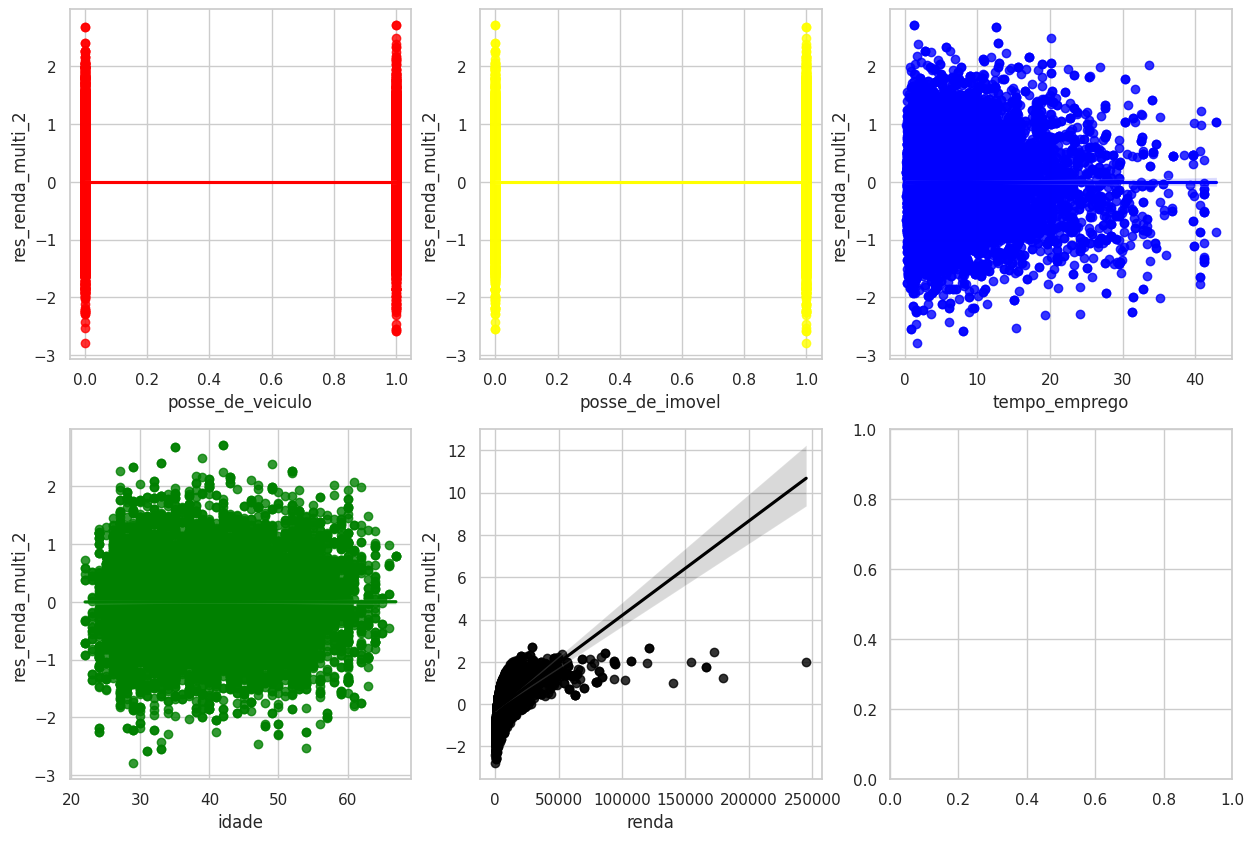

In [59]:
# Fecha todas as figuras previamente abertas
plt.close('all')

# Define o tamanho padrão das figuras
plt.rc('figure', figsize=(15, 10))

# Cria uma figura com subplots 2x3
fig, axes = plt.subplots(2, 3)

# Cada chamada a sns.regplot ou sns.countplot cria um gráfico em um dos subplots
sns.regplot(ax=axes[0, 0], x=df['posse_de_veiculo'], y=df['res_renda_multi_2'], color='red')
sns.regplot(ax=axes[0, 1], x=df['posse_de_imovel'], y=df['res_renda_multi_2'], color='yellow')
sns.regplot(ax=axes[0, 2], x=df['tempo_emprego'], y=df['res_renda_multi_2'], color='blue')
sns.regplot(ax=axes[1, 0], x=df['idade'], y=df['res_renda_multi_2'], color='green')
sns.regplot(ax=axes[1, 1], x=df['renda'], y=df['res_renda_multi_2'], color='black')
